# Classifying Data Exploration

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models 

2024-01-03 13:22:44.933461: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Preprocess the dataset

In [5]:
IMAGE_SIZE, BATCH_SIZE, CHANNELS  = 128, 32, 3

data = tf.keras.preprocessing.image_dataset_from_directory('../data/classifyData/Training',
                                                          image_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                          batch_size = BATCH_SIZE
                                                          )

Found 5712 files belonging to 4 classes.


2024-01-03 13:28:14.981618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-03 13:28:15.941615: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14794 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:17:00.0, compute capability: 7.5
2024-01-03 13:28:15.943166: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14015 MB memory:  -> device: 1, name: Quadro RTX 5000, pci bus id: 0000:65:00.0, compute capability: 7.5


In [11]:
cls_names = data.class_names
print(cls_names)
for image_batch, labels_batch in data.take(1):
    print(image_batch.shape)
    print(labels_batch)

['glioma', 'meningioma', 'notumor', 'pituitary']
(32, 128, 128, 3)
tf.Tensor([2 2 3 2 2 0 1 0 1 1 0 3 3 2 0 2 2 2 0 2 0 2 1 1 1 2 1 0 3 1 1 2], shape=(32,), dtype=int32)


## Visuaization

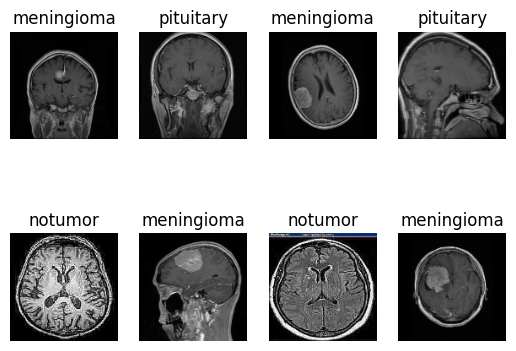

In [14]:
for image_batch, labels_batch in data.take(1):
    for i in range(8):
        ax = plt.subplot(2, 4, i+1)
        plt.axis('off')
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(cls_names[labels_batch[i]])
# plt.savefig('')